In [1]:
import datetime 

import matplotlib.pyplot as plt

from cygnss_wetlands.cygnss.reader import CONFIG, CygnssL1Reader
from cygnss_wetlands.enums import GridType
from cygnss_wetlands.grids.ease import EASE2GRID

## A little demo of reading in CYGNSS L1 data and aggregating to a grid

### 1. Focus on Pacaya Samiria - Peru

In [2]:
# Create our reader object

# Note: ingestion is a lot faster if we limit it to a smaller geopgraphic area of interest
# (this is optional! The default is the full extent of CYGNSS mission range)
PACAYA_SAMIRIA_BBOX = (-77, -7, -73, -3) # xmin, ymin, xmax, ymax

reader = CygnssL1Reader(bbox=PACAYA_SAMIRIA_BBOX)

In [3]:
# Let's pick a grid we can aggregate/post our data to

# Here's a list of what is supported currently
# (custom grids can also be made! and more functionality is planned to be added!)
GridType.namelist()

['EASE2_G1km',
 'EASE2_G3km',
 'EASE2_N3km',
 'EASE2_S3km',
 'EASE2_G3125km',
 'EASE2_N3125km',
 'EASE2_S3125km',
 'EASE2_G625km',
 'EASE2_N625km',
 'EASE2_S625km',
 'EASE2_G9km',
 'EASE2_N9km',
 'EASE2_S9km',
 'EASE2_G125km',
 'EASE2_N125km',
 'EASE2_S125km',
 'EASE_G125km',
 'EASE_N125km',
 'EASE_S125km',
 'EASE2_G25km',
 'EASE2_N25km',
 'EASE2_S25km',
 'EASE_G25km',
 'EASE_N25km',
 'EASE_S25km',
 'EASE2_G36km',
 'EASE2_N36km',
 'EASE2_S36km']

100%|███████████████████████████████████| 125/125 [00:25<00:00,  4.91it/s]


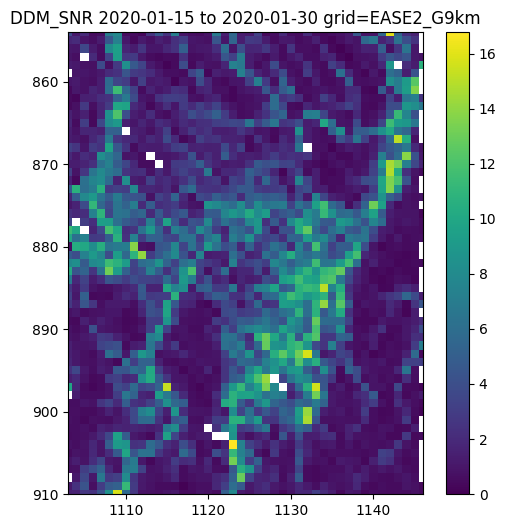

In [39]:
# Read 15-days of data, post to 9km grid
grid9km = EASE2GRID(GridType.EASE2_G9km)
d1 = datetime.datetime(2020,1,15)
d2 = datetime.datetime(2020,1,30)
snr = reader.aggregate(variable_name="ddm_snr", grid=grid9km, start_date=d1, end_date=d2)

# Plot
bbox_grid_xmin, bbox_grid_ymin = grid9km.lonlat2rc(reader.xmin, reader.ymin)
bbox_grid_xmax, bbox_grid_ymax = grid9km.lonlat2rc(reader.xmax, reader.ymax)

fig, ax = plt.subplots(figsize=(6,6))
pos = ax.imshow(snr)
fig.colorbar(pos, ax=ax)
ax.set_title(f"DDM_SNR {d1.strftime('%Y-%m-%d')} to {d2.strftime('%Y-%m-%d')} grid={grid9km.name}")
ax.set_xlim(bbox_grid_xmin, bbox_grid_xmax)
ax.set_ylim(bbox_grid_ymin, bbox_grid_ymax)
plt.savefig("11520-13020.png")
plt.show()

In [11]:
grid9km = EASE2GRID(GridType.EASE2_G9km)

d1 = datetime.datetime(2020,4,15)
d2 = datetime.datetime(2020,4,16)

snr = reader.aggregate(variable_name="ddm_snr", grid=grid9km, start_date=d1, end_date=d2)

# Plot
bbox_grid_xmin, bbox_grid_ymin = grid9km.lonlat2rc(reader.xmin, reader.ymin)
bbox_grid_xmax, bbox_grid_ymax = grid9km.lonlat2rc(reader.xmax, reader.ymax)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(snr)
fig.colorbar(pos, ax=ax)
ax.set_title(f"DDM_SNR {d1.strftime('%Y-%m-%d')} to {d2.strftime('%Y-%m-%d')} grid={grid9km.name}")
ax.set_xlim(bbox_grid_xmin, bbox_grid_xmax)
ax.set_ylim(bbox_grid_ymin, bbox_grid_ymax)

plt.savefig("10120-11520.png")
plt.show()

1 day, 0:00:00


0it [00:00, ?it/s]


ValueError: No objects to concatenate

100%|███████████████████████████████████| 125/125 [00:25<00:00,  4.84it/s]


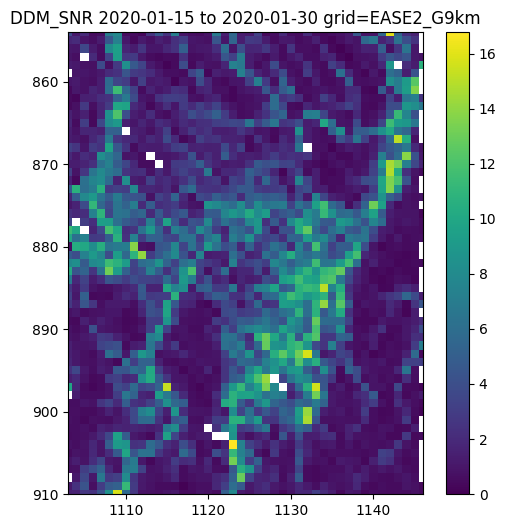

In [45]:
# Read 15-days of data, post to 9km grid
d1 = datetime.datetime(2020,1,15)
d2 = datetime.datetime(2020,1,30)
snr = reader.aggregate(variable_name="ddm_snr", grid=grid9km, start_date=d1, end_date=d2)

# Plot
bbox_grid_xmin, bbox_grid_ymin = grid9km.lonlat2rc(reader.xmin, reader.ymin)
bbox_grid_xmax, bbox_grid_ymax = grid9km.lonlat2rc(reader.xmax, reader.ymax)

fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(snr)
fig.colorbar(pos, ax=ax)
ax.set_title(f"DDM_SNR {d1.strftime('%Y-%m-%d')} to {d2.strftime('%Y-%m-%d')} grid={grid9km.name}")
ax.set_xlim(bbox_grid_xmin, bbox_grid_xmax)
ax.set_ylim(bbox_grid_ymin, bbox_grid_ymax)
plt.savefig("11520-13020.png")
plt.show()

In [46]:
import imageio;
image_files = ["10120-11520.png","11520-13020.png"]
images = []

for file_name in image_files:
  images.append(imageio.imread(file_name))

gif_path = "movie2.gif"
imageio.mimsave(gif_path, images)

/var/folders/ms/bhh364yd0kn1d8q3_cp434t40000gq/T/ipykernel_74201/844653444.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_name))


In [7]:
import imageio;

image_files = ["10120-11520.png","11520-13020.png"]

writer = imageio.get_writer('test.mp4', fps=20)

for im in fileList:
    writer.append_data(imageio.imread(im))
writer.close()

ValueError: Could not find a backend to open `test.mp4`` with iomode `w?`.
Based on the extension, the following plugins might add capable backends:
  FFMPEG:  pip install imageio[ffmpeg]
  pyav:  pip install imageio[pyav]

In [48]:
def generateFigure(figureName, year, month, startDate, endDate):
    d1 = datetime.datetime(year, month, startDate)
    d2 = datetime.datetime(year, month, endDate)

    snr = reader.aggregate(variable_name="ddm_snr", grid=grid9km, start_date=d1, end_date=d2)

    # Plot
    bbox_grid_xmin, bbox_grid_ymin = grid9km.lonlat2rc(reader.xmin, reader.ymin)
    bbox_grid_xmax, bbox_grid_ymax = grid9km.lonlat2rc(reader.xmax, reader.ymax)

    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(snr)
    fig.colorbar(pos, ax=ax)
    ax.set_title(f"DDM_SNR {d1.strftime('%Y-%m-%d')} to {d2.strftime('%Y-%m-%d')} grid={grid9km.name}")
    ax.set_xlim(bbox_grid_xmin, bbox_grid_xmax)
    ax.set_ylim(bbox_grid_ymin, bbox_grid_ymax)
    plt.savefig(figureName)
    plt.show()


def animate(year, startMonth, endMonth):
    import imageio
    
    frames = []
    
    # Starting with 9km grid, will parameterize later
    grid9km = EASE2GRID(GridType.EASE2_G9km)

    # Starting with 15 day intervals, will parameterize later
    intervals=[(1,15), (15,30)]

    for month in range(startMonth, endMonth+1):
        for dateInterval in intervals:
            figName = "DDM_SNR_" + str(year) + f"{month:02}" + f"{dateInterval[0]:02}" + "-" + str(year) + f"{month:02}" + f"{dateInterval[1]:02}" + ".png"
            generateFigure(figName, year, month, dateInterval[0], dateInterval[1])
            frames.append(figName)
    
    #frames = ["10120-11520.png","11520-13020.png"]

    #frames = ["DDM_SNR_20200101-20200115.png", "DDM_SNR_20200115-20200130.png"]
    images = []
    for file_name in frames:
      images.append(imageio.imread(file_name))

    gif_path = "DDM_SNR_" + str(year) + f"{startMonth:02}" + "-" + str(year) + f"{endMonth:02}" + ".gif"
    imageio.mimsave(gif_path, images)
            
   # print(frames)
    

100%|███████████████████████████████████| 120/120 [00:24<00:00,  5.00it/s]


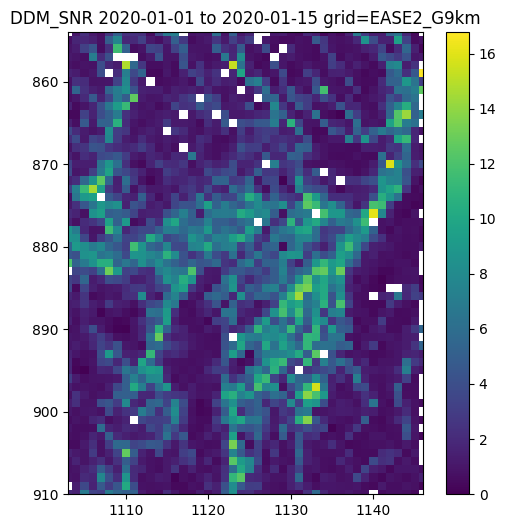

100%|███████████████████████████████████| 125/125 [00:25<00:00,  4.90it/s]


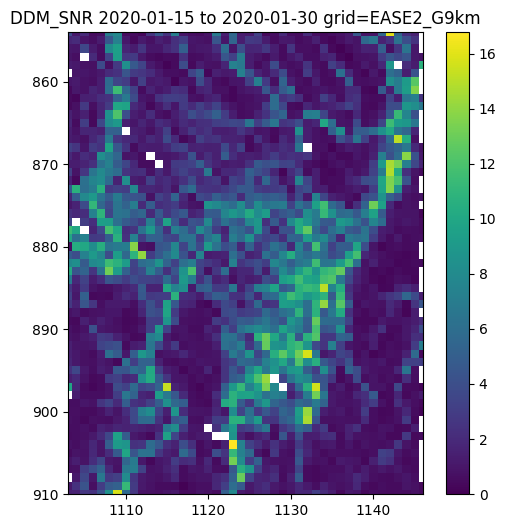

/var/folders/ms/bhh364yd0kn1d8q3_cp434t40000gq/T/ipykernel_74201/1035582645.py:43: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_name))


In [49]:
animate(2020, 1, 1)